In [1]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import time
import pandas as pd
import os
import glob
import seaborn as sns

In [3]:
filename = 'result/discriminator/mnist_label_3_dim_2_std_1e-05_zero_base.pickle'
with open(filename, 'rb') as file:
    df = pickle.load(file)

In [4]:
df

,True positive lime zero,True negative lime zero,True positive lime,True negative lime,True positive shap,True negative shap
0,0.88,0.70,0.98,1.0,1.00,1.00
1,0.76,0.70,1.00,1.0,0.96,1.00
2,0.78,0.64,1.00,1.0,1.00,1.00
3,0.86,0.70,0.98,1.0,1.00,1.00
4,0.80,0.76,1.00,1.0,0.98,1.00
...,...,...,...,...,...,...
95,0.82,0.66,1.00,1.0,0.98,0.98
96,0.82,0.70,1.00,1.0,1.00,1.00
97,0.80,0.68,1.00,1.0,0.94,0.98
98,0.78,0.66,1.00,1.0,0.96,1.00


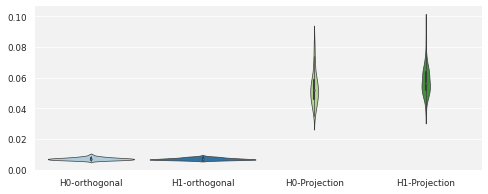

In [2]:
# Draw persistence diagram

# DIM = 2
DIM = 3

# RADIUSES = [0.001, 0.01, 0.1, 1.0] # for general mnist
# RADIUSES = [0.001, 0.002, 0.005, 0.01] # for mnist dim = 2
# RADIUSES = [0.000001, 0.00001, 0.0001] # for compass
# RADIUSES = [0.00001, 0.0001, 0.001] # for german and cc

RADIUSES = [0.001]


# EXPERIMENTS = ['mnist']
# EXPERIMENTS = ['fashion_mnist']
# EXPERIMENTS = ['compass']
# EXPERIMENTS = ['german', 'cc']
EXPERIMENTS = ['fashion_mnist']


PATH = 'result/bottleneck/'
SAVEPATH = 'result/images/'
# PLOTCOL = ['H0_gauss', 'H1_gauss', 'H0_ortho','H1_ortho', 'H0_plane', 'H1_plane']
PLOTCOL = ['H0_ortho', 'H1_ortho', 'H0_plane', 'H1_plane']

for EXPERIMENT in EXPERIMENTS:
    for RADIUS in RADIUSES:
        load_files = PATH + EXPERIMENT + '_label_*_dim_' + str(DIM) + '_std_' + str(RADIUS) + '_.pickle'
        read_list = glob.glob(load_files)

        list_of_dfs = []
        for file in read_list:
            with open(file, 'rb') as file:
                d = pickle.load(file)
            list_of_dfs.append(d)

        big_df = pd.concat(list_of_dfs, ignore_index=True)

        title = 'Normalized bottleneck distances for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS)
        title = 'Normalized Bottleneck-distances'
        plt.figure(figsize=(8, 3))
        sns.set_context("paper")
        sns.set_style("darkgrid", {"axes.facecolor": ".95"})
        ax = sns.violinplot(data=big_df[PLOTCOL], width=0.95,
                         palette="Paired",
                           linewidth = 0.7)
        ax.set_xticklabels(['H0-orthogonal', 'H1-orthogonal', 'H0-Projection', 'H1-Projection'])
#         ax.set(title = title)
#         ax.set_title(title, fontsize = 14)
        sns.despine(left=True);
        plt.ylim(0,)
#         plt.savefig(SAVEPATH + "BD_fashion_mnist" + '.png')

#         plt.savefig(SAVEPATH + title + '.png')

    

In [3]:
from PIL import Image

DIM = 2
RADIUS = '*'
EXPERIMENT = 'mnist'
SAVEPATH = 'result/images/'

plot_files = SAVEPATH + 'Normalized bottleneck distances for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS) + '.png'

bmps = glob.glob(plot_files)


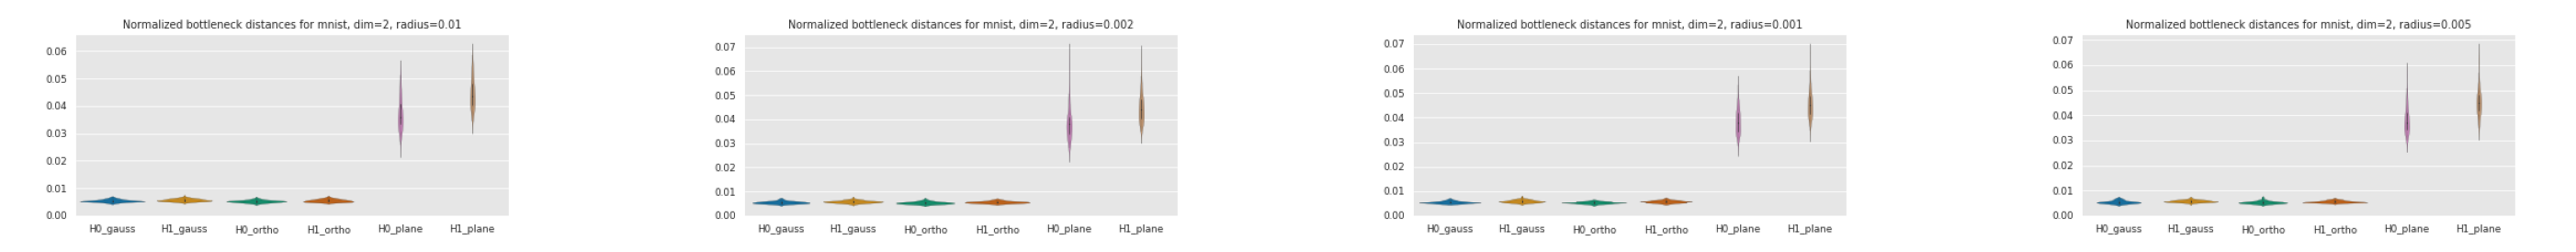

In [4]:
width=5
height=5
rows = 1
cols = 4
axes=[]
fig=plt.figure(figsize=(50, 20))

for a in range(rows*cols):
    b = Image.open(bmps[a])
    axes.append( fig.add_subplot(rows, cols, a+1) )
#     subplot_title=("Subplot"+str(a))
#     axes[-1].set_title(subplot_title)  
    plt.imshow(b)
    plt.axis('off')
# fig.tight_layout()    
plt.show()

(0.0, 1.0)

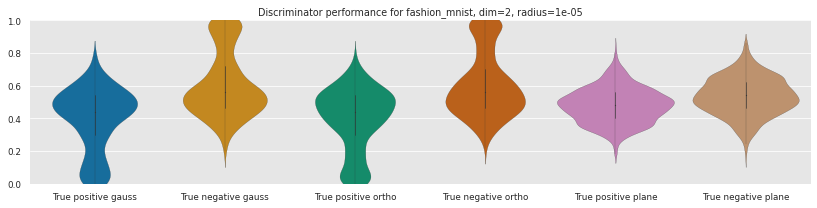

In [7]:
# Draw discriminator

DIM = 2

RADIUS = 0.00001

# EXPERIMENT = 'mnist'
EXPERIMENT = 'fashion_mnist'

PATH = 'result/discriminator/'
SAVEPATH = 'result/images/'
PLOTCOL = ['True positive gauss', 'True negative gauss', 'True positive ortho', 'True negative ortho', 'True positive plane', 'True negative plane']
# PLOTCOL = ['H0_gauss', 'H1_gauss', 'H0_plane', 'H1_plane']

load_files = PATH + EXPERIMENT + '_label_*_dim_' + str(DIM) + '_std_' + str(RADIUS) + '_.pickle'
read_list = glob.glob(load_files)

list_of_dfs = []
for file in read_list:
    with open(file, 'rb') as file:
        d = pickle.load(file)
    list_of_dfs.append(d)

big_df = pd.concat(list_of_dfs, ignore_index=True)

title = 'Discriminator performance for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS)
plt.figure(figsize=(14, 3))
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.violinplot(data=big_df[PLOTCOL], width=0.9,
                 palette="colorblind",
                   linewidth = 0.2)
ax.set(title = title)
sns.despine(left=True);
plt.ylim(0,1)

#         plt.savefig(SAVEPATH + title + '.png')

In [6]:
big_df

,True positive gauss,True negative gauss,True positive plane,True negative plane,True positive ortho,True negative ortho,True positive lime,True negative lime,True positive shap,True negative shap
0,0.70,0.30,0.52,0.48,0.32,0.68,1.00,1.00,0.94,0.94
1,0.32,0.72,0.34,0.68,0.32,0.70,0.96,0.96,0.88,0.88
2,0.22,0.78,0.58,0.42,0.60,0.40,0.96,0.96,0.94,0.94
3,0.50,0.50,0.52,0.46,0.70,0.30,1.00,1.00,0.94,0.94
4,0.40,0.60,0.66,0.40,0.24,0.78,1.00,1.00,0.94,0.94
...,...,...,...,...,...,...,...,...,...,...
995,0.36,0.64,0.48,0.54,0.52,0.48,1.00,1.00,0.96,0.96
996,0.42,0.58,0.44,0.56,0.30,0.70,0.94,0.94,0.96,0.96
997,0.40,0.60,0.62,0.38,0.46,0.54,0.90,0.90,0.98,0.98
998,0.30,0.70,0.60,0.38,0.26,0.76,0.96,0.96,0.98,0.98


In [22]:
plot_df = pd.DataFrame()

col_names = ['LIME (TP)','LIME (TN)',
             'SHAP (TP)','SHAP (TN)', 
             'EMaP d=2 (TP)','EMaP d=2 (TN)']

plot_df['SHAP (TP)'] = big_df['True positive shap']
plot_df['LIME (TP)'] = big_df['True positive lime']
plot_df['SHAP (TN)'] = big_df['True negative shap']
plot_df['LIME (TN)'] = big_df['True negative lime']
plot_df['EMaP d=2 (TP)'] = big_df['True positive ortho']
plot_df['EMaP d=2 (TN)'] = big_df['True negative ortho']


# discriminator_file = 'result/discriminator/cc_label_1_dim_2_std_1e-05_.pickle'
# d = pd.read_pickle(discriminator_file)
# plot_df['EMaP (r=0.00001)'] = d['True positive ortho']

plot_df.describe()

,SHAP (TP),LIME (TP),SHAP (TN),LIME (TN),EMaP d=2 (TP),EMaP d=2 (TN)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.931680,0.966960,0.931680,0.966960,0.398800,0.604740
std,0.033572,0.040561,0.033572,0.040561,0.190079,0.196013
min,0.800000,0.780000,0.800000,0.780000,0.000000,0.220000
25%,0.900000,0.960000,0.900000,0.960000,0.300000,0.460000
50%,0.940000,0.980000,0.940000,0.980000,0.440000,0.560000
75%,0.960000,1.000000,0.960000,1.000000,0.540000,0.700000
max,1.000000,1.000000,1.000000,1.000000,0.780000,1.000000


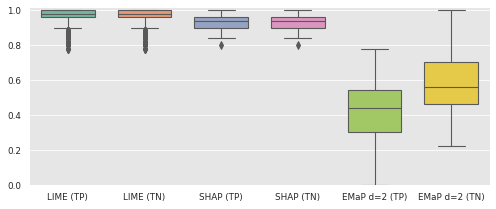

In [23]:
plt.figure(figsize=(7, 3))
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(data=plot_df[col_names], width=0.7,
                   palette="Set2",
                   linewidth = 1.1)
# ax.set_xticklabels(col_names)
#         ax.set(title = title)
#         ax.set_title(title, fontsize = 14)
sns.despine(left=True);
plt.ylim(0,1.01)
plt.tight_layout()
plt.savefig('result/images/fashion_mnist_discriminator_d2_r0_00001.png')

In [14]:
ax

<AxesSubplot:>